### **Import Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### **Import Dataset**

In [ ]:
# Import Dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### **Data OVerview**

In [ ]:
print(df.shape)

(45000, 14)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
print(df.describe().T)

                              count          mean           std      min  \
person_age                  45000.0     27.764178      6.045108    20.00   
person_income               45000.0  80319.053222  80422.498632  8000.00   
person_emp_exp              45000.0      5.410333      6.063532     0.00   
loan_amnt                   45000.0   9583.157556   6314.886691   500.00   
loan_int_rate               45000.0     11.006606      2.978808     5.42   
loan_percent_income         45000.0      0.139725      0.087212     0.00   
cb_person_cred_hist_length  45000.0      5.867489      3.879702     2.00   
credit_score                45000.0    632.608756     50.435865   390.00   
loan_status                 45000.0      0.222222      0.415744     0.00   

                                 25%       50%       75%         max  
person_age                     24.00     26.00     30.00      144.00  
person_income               47204.00  67048.00  95789.25  7200766.00  
person_emp_exp            

In [ ]:
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.nunique())

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


loan_status
0    35000
1    10000
Name: count, dtype: int64


<ipython-input-41-361045ee6707>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="viridis")


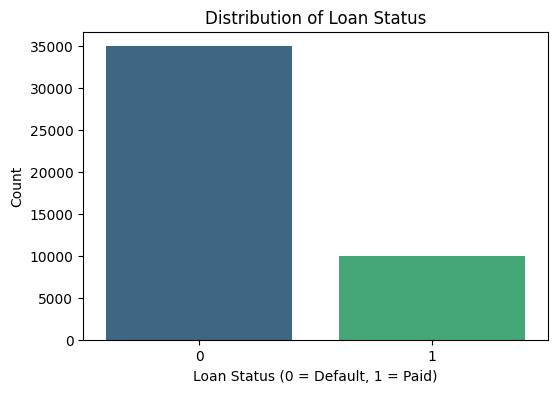

In [ ]:
# Count the occurrences of each class (0 and 1) in loan_status
loan_status_counts = df['loan_status'].value_counts()

# Print the counts
print(loan_status_counts)

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="viridis")
plt.xlabel("Loan Status (0 = Default, 1 = Paid)")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.xticks([0, 1])
plt.show()

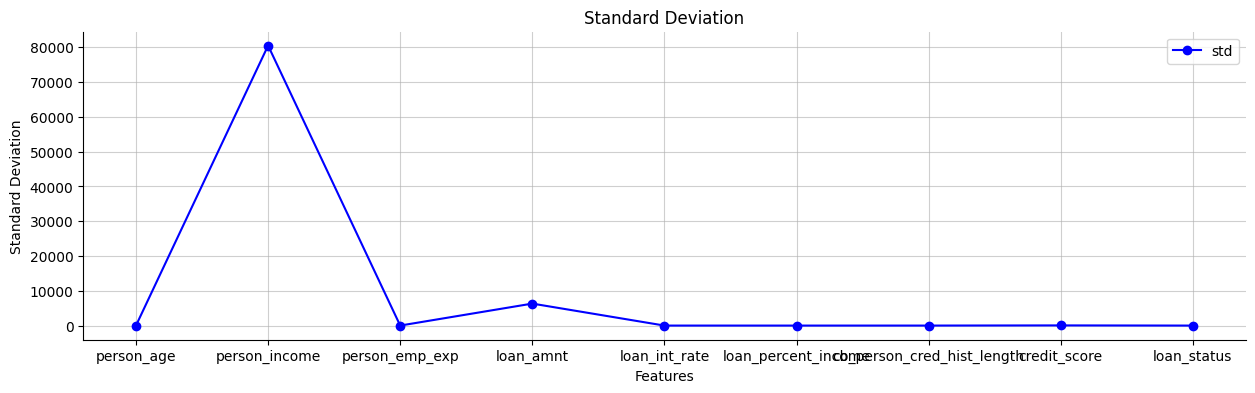

In [ ]:
df.describe().T.plot(kind='line', y='std', figsize=(15, 4), title='Standard Deviation', color='b', linestyle='-', marker='o')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.grid(True, linestyle='-', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Group data by numeric and categorical types
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# View outliers in numerical data
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).sum()
print(f"Outliers Count:\n{outliers}")

Outliers Count:
person_age                     2188
person_income                  2218
person_emp_exp                 1724
loan_amnt                      2348
loan_int_rate                   124
loan_percent_income             744
cb_person_cred_hist_length     1366
credit_score                    467
loan_status                   10000
dtype: int64


In [ ]:
# Copy original dataframe
df_capped = df.copy()

# Replace outliers with lower and upper bound
for col in numeric_columns:
    df_capped[col] = df_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print("Outliers have been capped at the lower and upper bounds.")

Outliers have been capped at the lower and upper bounds.


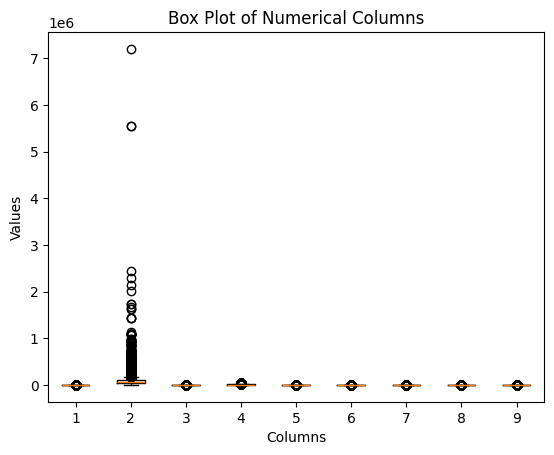

In [ ]:
plt.boxplot(df[numeric_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

### **Exploratory Data Analysis (EDA)**

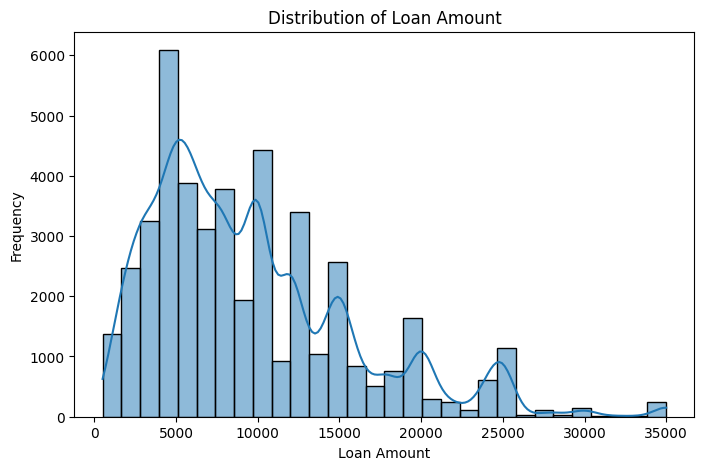

In [ ]:
# Knowing the distribution of the proposed loan amount
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.show()

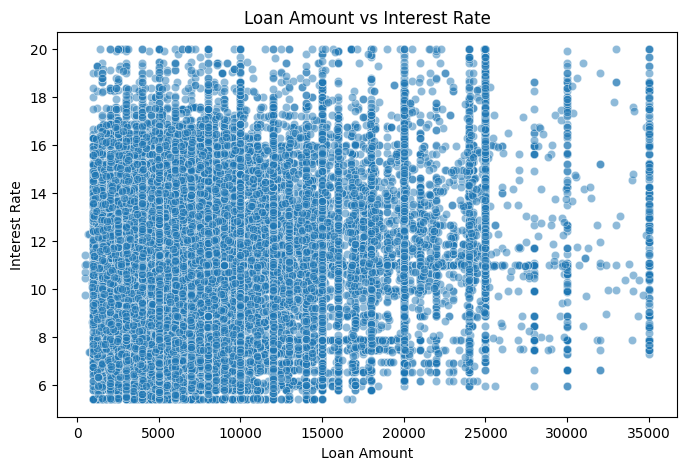

Korelasi antara Loan Amount dan Interest Rate: 0.15


In [ ]:
# Looking at the relationship between loan amount (loan_amnt) and interest rate (loan_int_rate)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['loan_amnt'], y=df['loan_int_rate'], alpha=0.5)
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate")
plt.show()

# Further analysis of the correlation of the 2 variables above
correlation = df['loan_amnt'].corr(df['loan_int_rate'])
print(f"Korelasi antara Loan Amount dan Interest Rate: {correlation:.2f}")

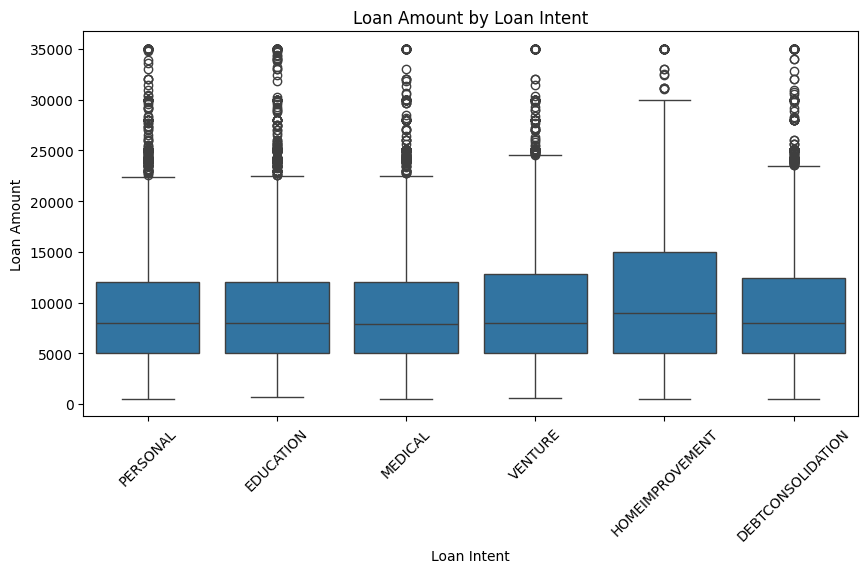

In [ ]:
#Viewing if there are certain categories with higher loan amounts.
plt.figure(figsize=(10,5))
sns.boxplot(x="loan_intent", y="loan_amnt", data=df)
plt.xlabel("Loan Intent")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Loan Intent")
plt.xticks(rotation=45)
plt.show()

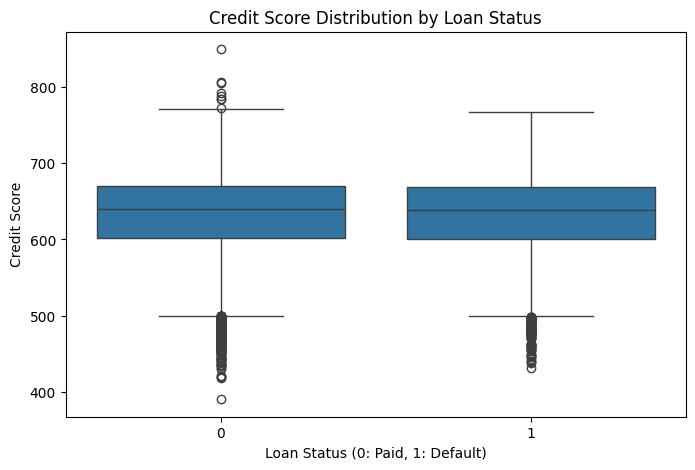

In [ ]:
# Find out if credit score affects the probability of default.
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="credit_score", data=df)
plt.xlabel("Loan Status (0: Paid, 1: Default)")
plt.ylabel("Credit Score")
plt.title("Credit Score Distribution by Loan Status")
plt.show()

<ipython-input-50-9cae0e463058>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["loan_status"] == 0]["loan_percent_income"], label="Paid", shade=True)
<ipython-input-50-9cae0e463058>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["loan_status"] == 1]["loan_percent_income"], label="Default", shade=True)


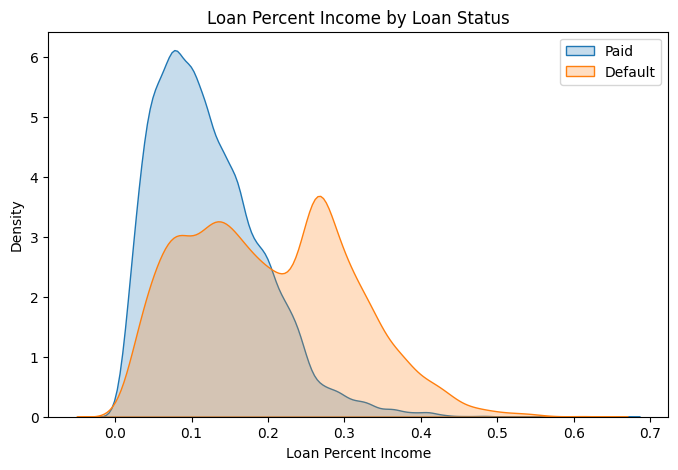

In [ ]:
# Knowing whether the greater proportion of income used to repay loans affects the probability of default.
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["loan_status"] == 0]["loan_percent_income"], label="Paid", shade=True)
sns.kdeplot(df[df["loan_status"] == 1]["loan_percent_income"], label="Default", shade=True)
plt.xlabel("Loan Percent Income")
plt.ylabel("Density")
plt.title("Loan Percent Income by Loan Status")
plt.legend()
plt.show()

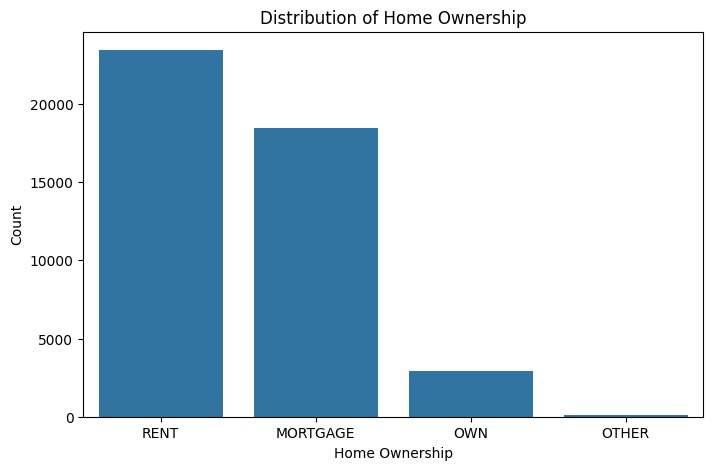

In [ ]:
# Knowing whether more borrowers own their homes, rent, or otherwise
plt.figure(figsize=(8,5))
sns.countplot(x="person_home_ownership", data=df, order=df["person_home_ownership"].value_counts().index)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Distribution of Home Ownership")
plt.show()

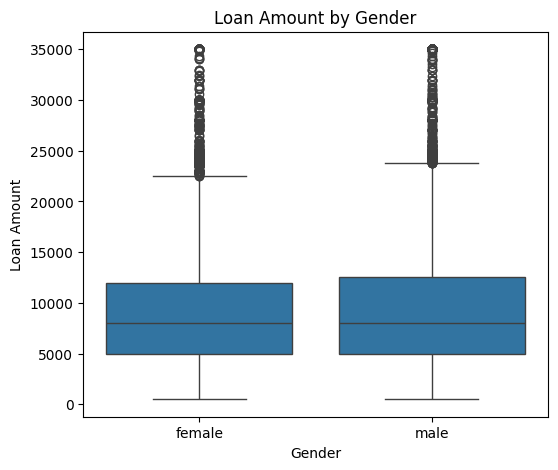

In [ ]:
# Find out if there is a significant difference in loan amounts by gender.
plt.figure(figsize=(6,5))
sns.boxplot(x="person_gender", y="loan_amnt", data=df)
plt.xlabel("Gender")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Gender")
plt.show()

### **Machine Learning Model Development & Evaluation**

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['loan_status', 'person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])
y = df['loan_status']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_columns = ['person_education']
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [ ]:
# Preprocess the data: apply OneHotEncoding to categorical features and scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale the numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encode the categorical features
    ])

In [ ]:
# Create a pipeline for Logistic Regression
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply the preprocessing steps
    ('logreg', LogisticRegression(max_iter=1000))  # Add the Logistic Regression model
])

# Define a reduced hyperparameter grid
param_grid_logreg = {
    'logreg__penalty': ['l1', 'l2'],  # Remove 'elasticnet'
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear'],  # 'liblinear' only supports 'l1' and 'l2'
    'logreg__max_iter': [100, 200]
}

# Apply GridSearchCV with reduced candidates
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_logreg.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {grid_search_logreg.best_params_}")
print(f"Best Cross-validation Score: {grid_search_logreg.best_score_}")

# Evaluate the model on the test set
test_score_logreg = grid_search_logreg.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score_logreg}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'logreg__C': 1, 'logreg__max_iter': 200, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best Cross-validation Score: 0.8295555555555556
Test Set Accuracy: 0.8241111111111111


In [ ]:
# Create a Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Define a reduced hyperparameter grid
param_grid_dtree = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20],  # Reduce depth options
    'decisiontreeclassifier__min_samples_split': [2, 5],  # Reduce split options
    'decisiontreeclassifier__min_samples_leaf': [1, 2],  # Reduce leaf options
    'decisiontreeclassifier__max_features': [None, 'sqrt'],  # Reduce feature options
    'decisiontreeclassifier__class_weight': [None, 'balanced']
}

# Create a pipeline that first applies the preprocessor and then fits the decision tree model
pipeline_dtree = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeclassifier', dtree)
])

# Apply GridSearchCV with a reduced parameter space
grid_search_dtree = GridSearchCV(pipeline_dtree, param_grid_dtree, cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_dtree.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {grid_search_dtree.best_params_}")
print(f"Best Cross-validation Score: {grid_search_dtree.best_score_}")

# Evaluate the model on the test set
test_score_dtree = grid_search_dtree.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score_dtree}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'decisiontreeclassifier__class_weight': None, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 2}
Best Cross-validation Score: 0.8549722222222222
Test Set Accuracy: 0.853


In [ ]:
# Simulated predictions (Replace with actual predictions)
y_pred_logreg = grid_search_logreg.predict(X_test)
y_pred_tree = grid_search_dtree.predict(X_test)

# Simulated probabilities (Replace with actual predicted probabilities)
y_prob_logreg = grid_search_logreg.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_prob_tree = grid_search_dtree.predict_proba(X_test)[:, 1]  # Probability of the positive class

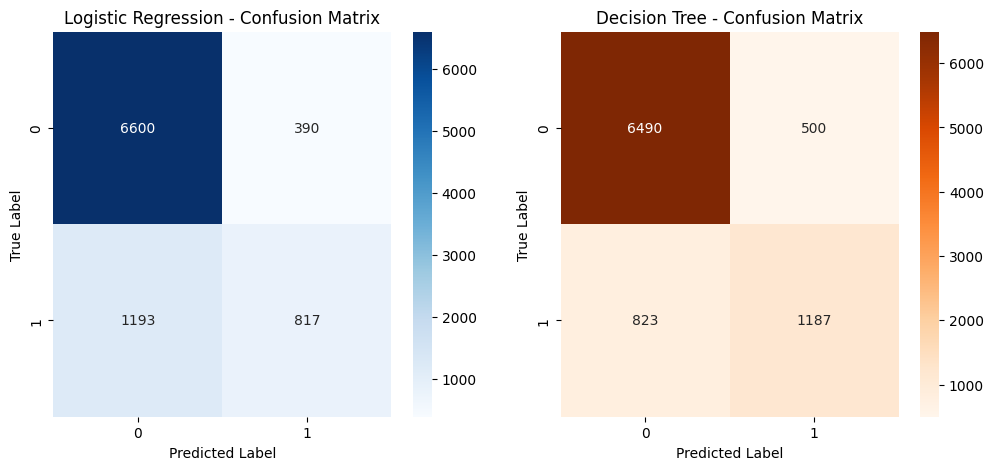

In [ ]:
# Compute Confusion Matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Compute ROC Curves and AUC Scores
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Decision Tree - Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

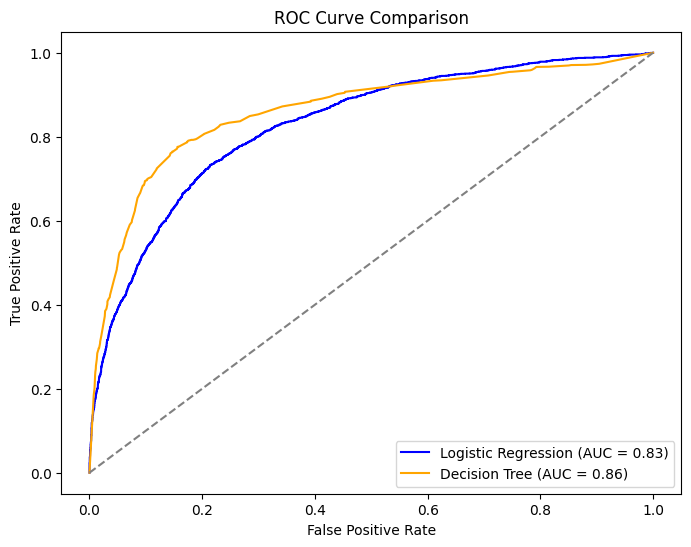

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color="blue", label=f"Logistic Regression (AUC = {roc_auc_logreg:.2f})")
plt.plot(fpr_tree, tpr_tree, color="orange", label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()